# 11장 CNN basic

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/home/shkim/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(1, 3, 3, 1)


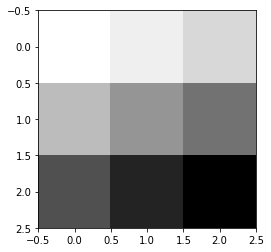

In [2]:
sess = tf.InteractiveSession()

# toy image 3x3x1
# [이미지개수][height][width][channel]
image = np.array([[
                                [[1],[2],[3]]
                              , [[4],[5],[6]]
                              , [[7],[8],[9]]]]
                            , dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

weight.shape (2, 2, 1, 1)
conv2d.shape (1, 2, 2, 1)
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


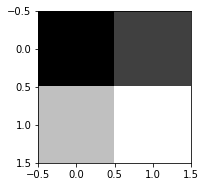

In [3]:
# filter 2x2
# [height][width][channel][필터 개수]
weight = tf.constant(
                                [[[[1.]], [[1.]]], 
                                 [[[1.]], [[1.]]]]
                                )
print('weight.shape', weight.shape)

# Must have strides[0] = strides[3] = 1.
# For the most common case of the same horizontal and vertices strides, 
# strides = [1, stride, stride, 1].
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
print('conv2d.shape', conv2d.shape)
conv2d_img = conv2d.eval()
print('conv2d_img.shape', conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)

for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

weight.shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


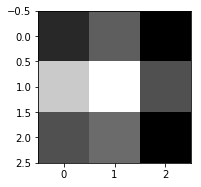

In [4]:
# filter 2x2
# [height][width][channel][필터 개수]
weight = tf.constant(
                                [[[[1.]], [[1.]]], 
                                 [[[1.]], [[1.]]]]
                                )
print('weight.shape', weight.shape)

# Must have strides[0] = strides[3] = 1.
# For the most common case of the same horizontal and vertices strides, 
# strides = [1, stride, stride, 1].
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
print('conv2d.shape', conv2d.shape)
conv2d_img = conv2d.eval()
print('conv2d_img.shape', conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)

for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


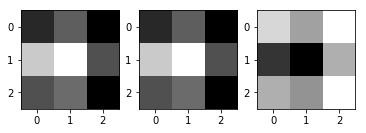

In [5]:
# 필터 3개
weight = tf.constant([[[[1.,10.,-1.]], [[1.,10.,-1.]]],
                                    [[[1.,10.,-1]], [[1.,10.,-1.]]]])
print('weight.shape', weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d_img = conv2d.eval()
print('conv2d_img.shape', conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1, 3, i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

In [6]:
image = np.array([[[[4],[3]], [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1,2,2,1], strides=[1,1,1,1], padding='SAME')

print(pool.shape)
print(pool.eval())
print(pool)

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]
Tensor("MaxPool:0", shape=(1, 2, 2, 1), dtype=float32)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


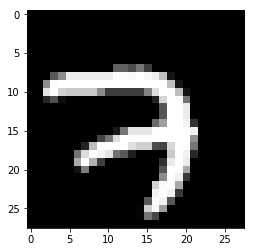

In [7]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

In [8]:
sess = tf.InteractiveSession()
img = img.reshape(-1, 28, 28, 1)

Tensor("Conv2D_3:0", shape=(1, 14, 14, 5), dtype=float32)


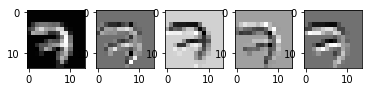

In [9]:
W1 = tf.Variable(tf.random_normal([3,3,1,5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1,2,2,1], padding='SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

Tensor("MaxPool_1:0", shape=(1, 7, 7, 5), dtype=float32)


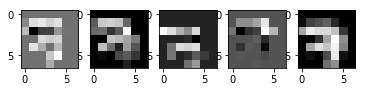

In [10]:
pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7,7), cmap='gray')